In [12]:
# from zipfile import ZipFile
# #Make Sure that all the zip files are in succesive order audio0.zip , audio1.zip , audio2.zip 
# #change the range(10) if it contains 10 zip files(10 speakers)
# for i in range(2):
#     zipTest = ZipFile(r'''/home/fractaluser/Desktop/test/voice-classification-master/audioInputs2/audio{}.zip'''.format(i), 'r')
#     zipTest.extractall(r'''/home/fractaluser/Desktop/test/voice-classification-master/audioInputs2/audio{}'''.format(i))

In [5]:
from pydub import AudioSegment
import os
from os import listdir
from os.path import isfile, join

In [7]:
#Conversion of mp3 to wav File
from pydub import AudioSegment
import os
from os import listdir
from os.path import isfile, join

AudioSegment.converter = r"ffmpeg"#r"/usr/local/lib/python2.7/dist-packages/tensorflow/contrib/ffmpeg"
#change the range(10)
for i in range(4):
    files = os.listdir(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/audio{}'''.format(i))
    
    if not os.path.exists(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wav{}'''.format(i)):
        os.makedirs(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wav{}'''.format(i))
    
    count = 1
    limit = 0
    for f in files:
        if(limit == 720): break
        sound = AudioSegment.from_mp3(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/audio{}/{}'''.format(i, f))
        out_f = sound.export(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wav{}/{}.wav'''.format(i, count), format="wav")
        out_f.close()
        count = count + 1
        limit = limit + 1

In [8]:
#Cutting down the .wav file(multiple wav files per directory) to 5 seconds interval
import subprocess
#change the range(10)
for i in range(4):
    in_path = os.listdir('/home/fractaluser/Desktop/SpeakAI/data1/train/wav{}'.format(i))
    if not os.path.exists(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wavs{}'''.format(i)):
        os.makedirs(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wavs{}'''.format(i))    
    for z in in_path:
        r = '/home/fractaluser/Desktop/SpeakAI/data1/train/wav{}/'.format(i)+z  
        out_path = '/home/fractaluser/Desktop/SpeakAI/data1/train/wavs{}/out%03d{}'.format(i,z)
        subprocess.call(['ffmpeg', '-i', r, '-f', 'segment','-segment_time', '5', '-c', 'copy', out_path])

In [4]:
import glob
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
def load_sound_files(file_paths):
    raw_sounds = []
    for fp in file_paths:
        X,sr = librosa.load(fp)
        raw_sounds.append(X)
    return raw_sounds


def plot_specgram(raw_sounds):
#     fig = plt.figure()
#     fig.subplots_adjust(left=0,right=1,bottom=0,top=1)
    for f in raw_sounds:
        plt.subplots(1)
#         plt.subplots_adjust(left=0,right=1,bottom=0,top=1)
#         plt.margins(x=0)
        specgram(np.array(f), Fs=sr)
#         plt.axis('tight')
        plt.axis('off')
#         plt.show()
        plt.savefig("test.png", bbox_inches='tight')

In [10]:
#Spectrogram of 5 sec wav files
import subprocess
#import sox
# 513 800 3
#change the range(10)
for i in range(4):
    files = os.listdir(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wavs{}'''.format(i))
    
    if not os.path.exists(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/speaker{}'''.format(i)):
        os.makedirs(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/speaker{}'''.format(i))
    
    count = 1
    for f in files:
        cmdstring = 'sox "{}" -n spectrogram -r -o "{}"'.format(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wavs{}/{}'''.format(i, f), r'''/home/fractaluser/Desktop/SpeakAI/data1/train/speaker{}/{}.png'''.format(i, count))
        subprocess.call(cmdstring, shell=True)
        count = count + 1

In [58]:
#for i in range(2):
#    files = os.listdir(r'''/home/fractaluser/Desktop/test/voice-classification-master/audioInputs/audio{}'''.format(i))
#    print(files)
#    for f in files:
#        print(f)

['celebratedcrimesv7p2_01_dumas_64kb.mp3', 'celebratedcrimesv7p2_04_dumas_64kb.mp3', 'celebratedcrimesv7p2_02_dumas_64kb.mp3', 'celebratedcrimesv7p2_03_dumas_64kb.mp3']
celebratedcrimesv7p2_01_dumas_64kb.mp3
celebratedcrimesv7p2_04_dumas_64kb.mp3
celebratedcrimesv7p2_02_dumas_64kb.mp3
celebratedcrimesv7p2_03_dumas_64kb.mp3
['rubaiyatmiscellany2_09_various_64kb.mp3', 'rubaiyatmiscellany2_06_various_64kb.mp3', 'rubaiyatmiscellany2_04_various_64kb.mp3', 'rubaiyatmiscellany2_02_various_64kb.mp3', 'rubaiyatmiscellany2_05_various_64kb.mp3', 'rubaiyatmiscellany2_07_various_64kb.mp3', 'rubaiyatmiscellany2_10_various_64kb.mp3', 'rubaiyatmiscellany2_03_various_64kb.mp3', 'rubaiyatmiscellany2_08_various_64kb.mp3', 'rubaiyatmiscellany2_01_various_64kb.mp3']
rubaiyatmiscellany2_09_various_64kb.mp3
rubaiyatmiscellany2_06_various_64kb.mp3
rubaiyatmiscellany2_04_various_64kb.mp3
rubaiyatmiscellany2_02_various_64kb.mp3
rubaiyatmiscellany2_05_various_64kb.mp3
rubaiyatmiscellany2_07_various_64kb.mp3
ruba

In [40]:
# files = os.listdir(r'''/home/fractaluser/Desktop/test/voice-classification-master/audioInputs/audio{}'''.format(i))
# print(files)

['celebratedcrimesv7p2_01_dumas_64kb.mp3', 'celebratedcrimesv7p2_04_dumas_64kb.mp3', 'celebratedcrimesv7p2_02_dumas_64kb.mp3', 'celebratedcrimesv7p2_03_dumas_64kb.mp3']


In [70]:
# in_path = os.listdir('/home/fractaluser/Desktop/test/voice-classification-master/audioInputs/wav{}'.format(i))
# for f in in_path:
#     print(f)

4.wav
2.wav
9.wav
10.wav
1.wav
8.wav
3.wav
7.wav
6.wav
5.wav


In [63]:
# out_path = '/home/fractaluser/Desktop/test/voice-classification-master/audioInputs/wavs{}/out%03d.wav'.format(i)
# print(out_path)

/home/fractaluser/Desktop/test/voice-classification-master/audioInputs/wavs1/out%03d.wav


In [34]:
# import sox
import subprocess
import os
from pydub import AudioSegment
import os
from os import listdir
from os.path import isfile, join
count=0
AudioSegment.converter = r"ffmpeg"
for i in range(5):
    file = os.listdir(r'''/home/fractaluser/Desktop/testing backgrou/audio{}'''.format(i))
    if not os.path.exists(r'''/home/fractaluser/Desktop/testing backgrou/speaker{}'''.format(i)):
        os.makedirs(r'''/home/fractaluser/Desktop/testing backgrou/speaker{}'''.format(i))
    for f in file:
        print(f)
        cmdstring = 'ffmpeg -i "{}" -vn -ss 00:00:00 -t 00:00:0.5 "{}"'.format(r'''/home/fractaluser/Desktop/testing backgrou/audio{}/{}'''.format(i, f), r'''/home/fractaluser/Desktop/testing backgrou/speaker{}/{}.wav'''.format(i, count))
        subprocess.call(cmdstring, shell=True)
        cmdstring = 'sox "{}" -n noiseprof "{}"'.format(r'''/home/fractaluser/Desktop/testing backgrou/speaker{}/{}.wav'''.format(i, count), r'''/home/fractaluser/Desktop/testing backgrou/speaker{}/noise_profile_file{}'''.format(i, count))
        subprocess.call(cmdstring, shell=True)
        cmdstring = 'sox "{}" "{}" noisered "{}" 0.24'.format(r'''/home/fractaluser/Desktop/testing backgrou/audio{}/{}'''.format(i, f), r'''/home/fractaluser/Desktop/testing backgrou/speaker{}/{}.mp3'''.format(i, count),r'''/home/fractaluser/Desktop/testing backgrou/speaker{}/noise_profile_file{}'''.format(i, count))
        subprocess.call(cmdstring, shell=True)
    count=count+1
        

speaker0.mp3
speaker1.mp3
speaker2.mp3
speaker3.mp3
speaker4.mp3


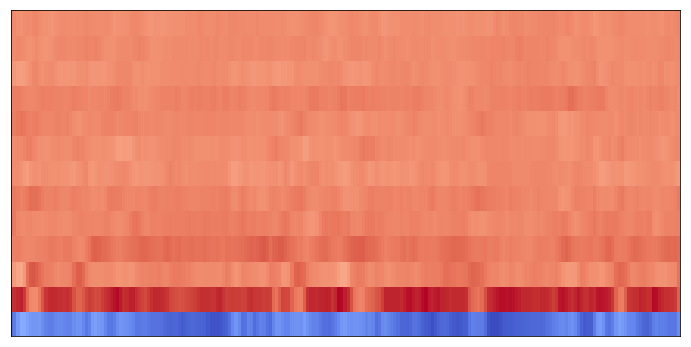

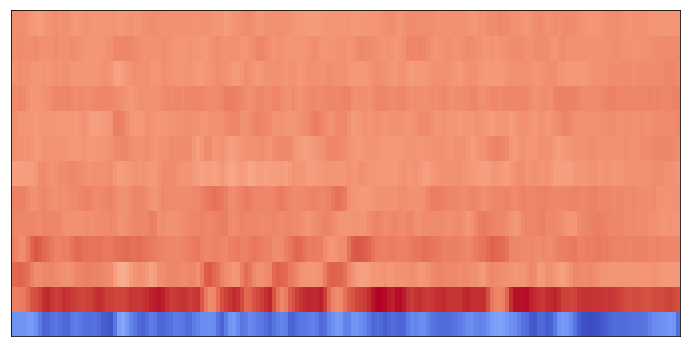

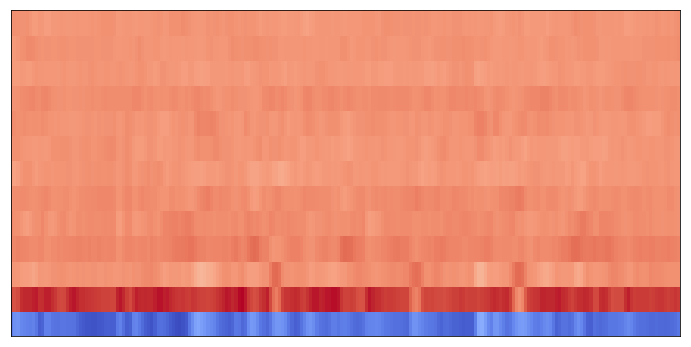

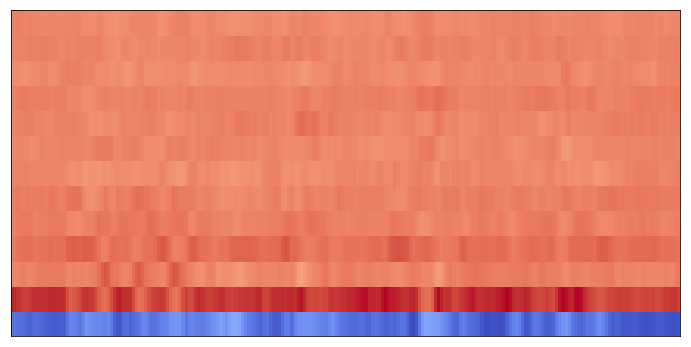

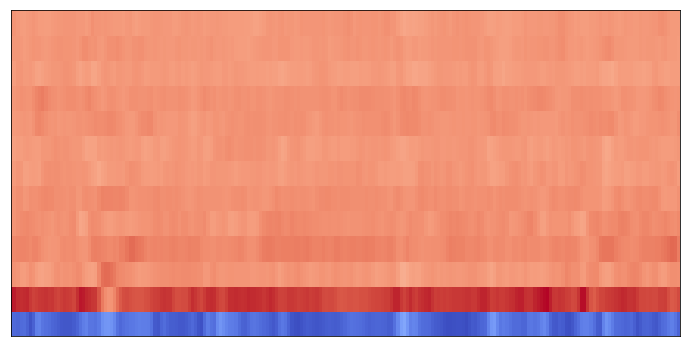

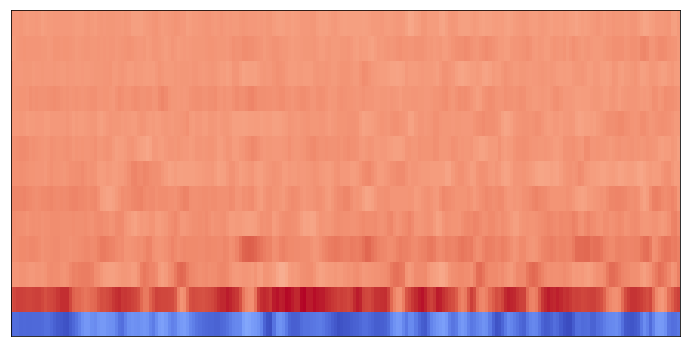

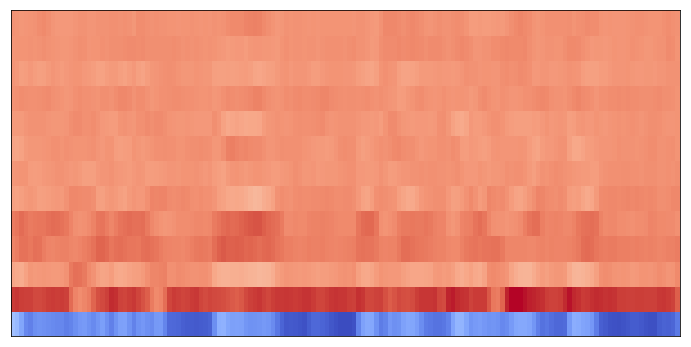

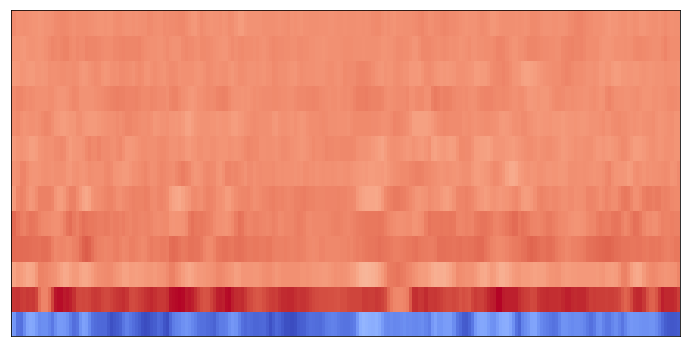

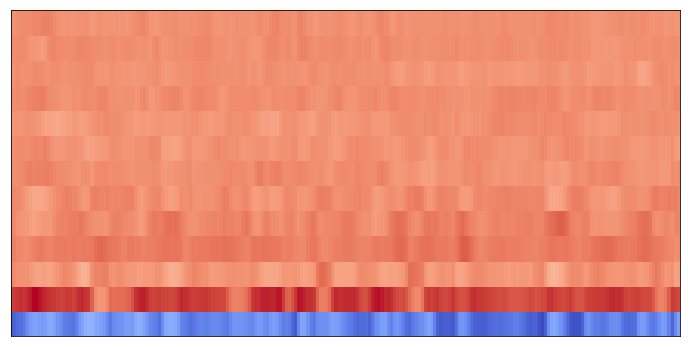

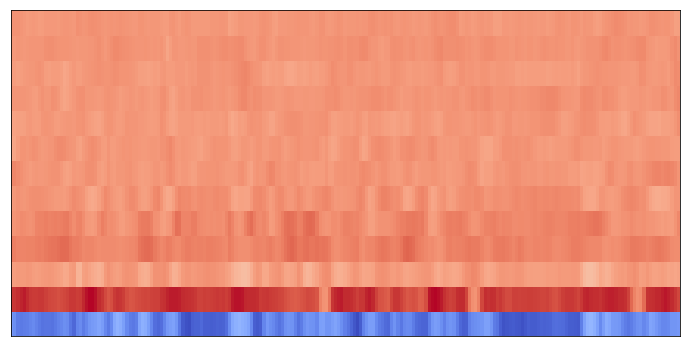

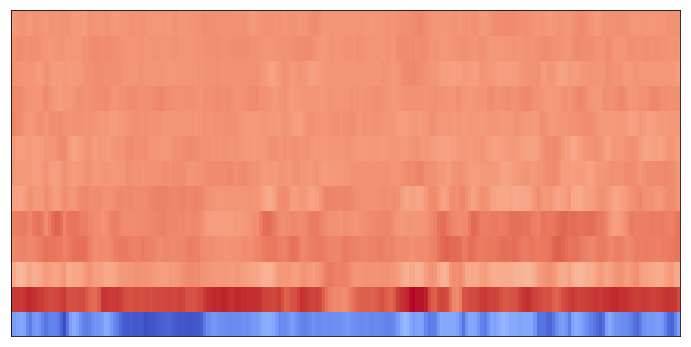

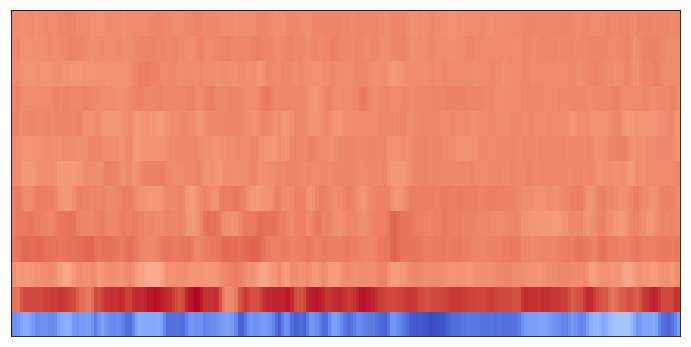

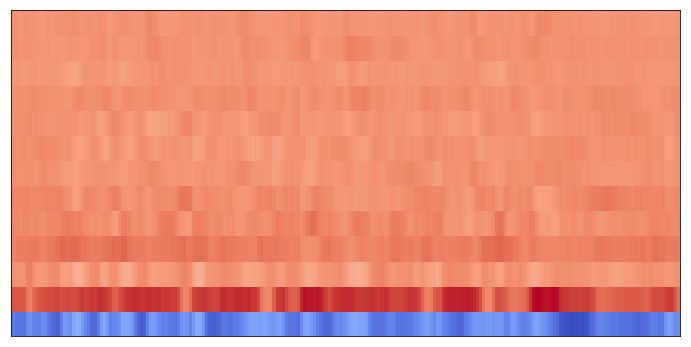

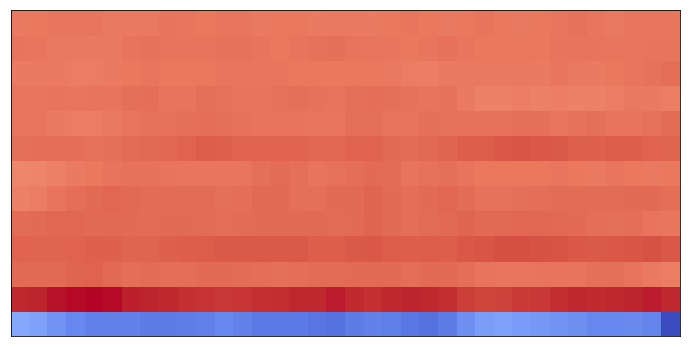

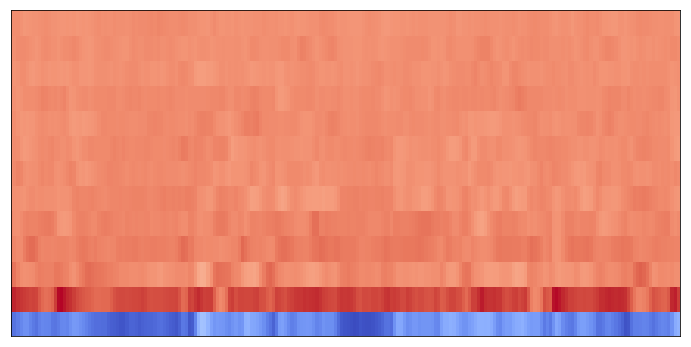

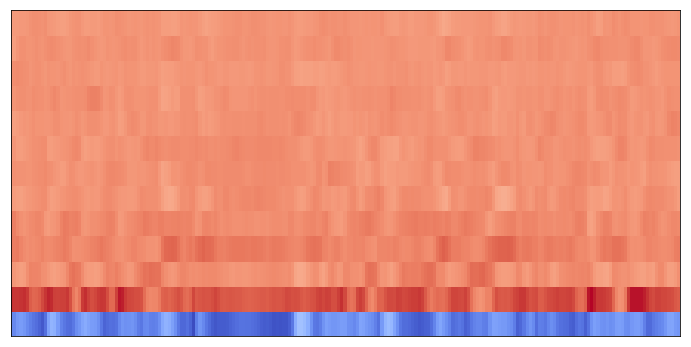

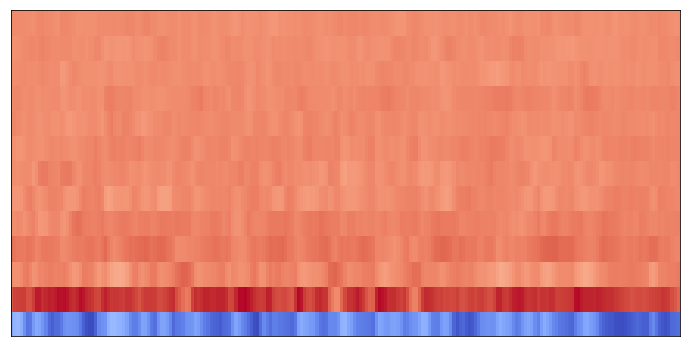

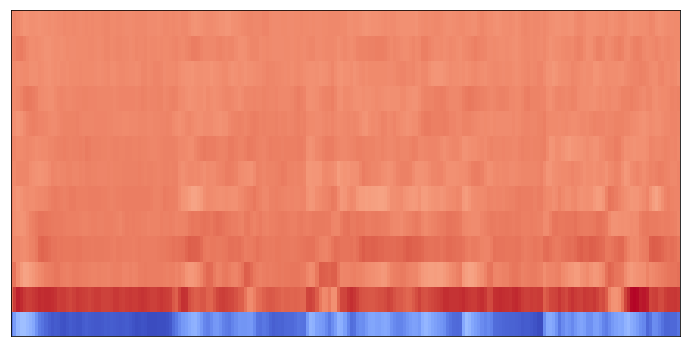

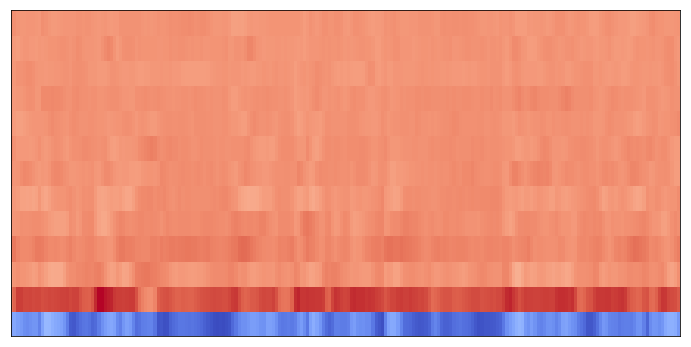

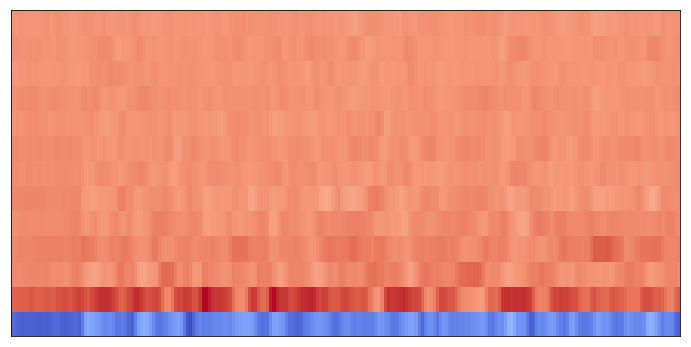

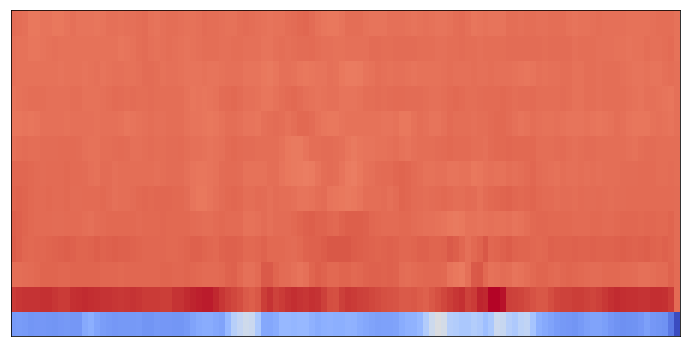

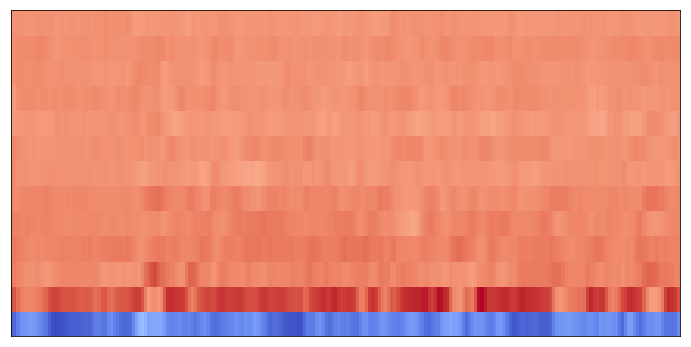

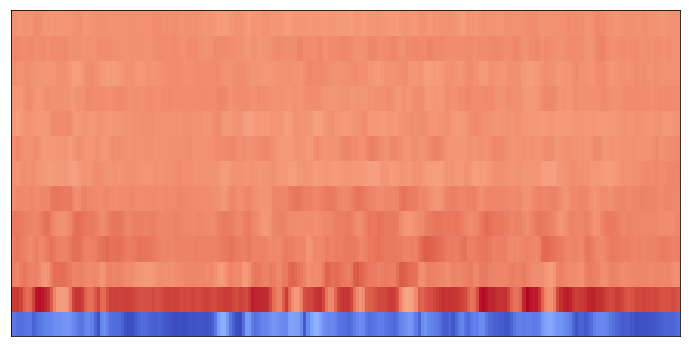

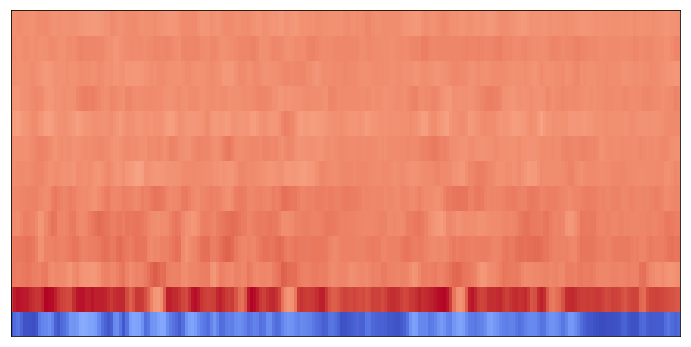

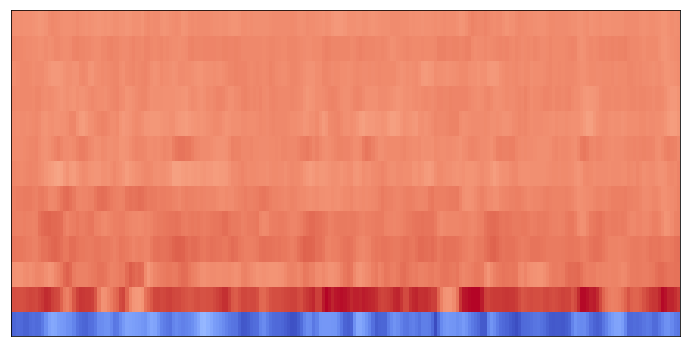

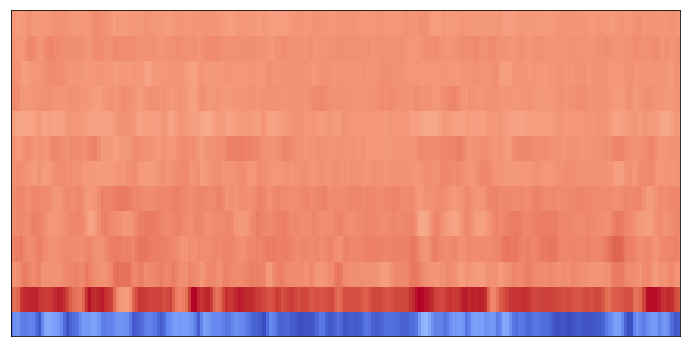

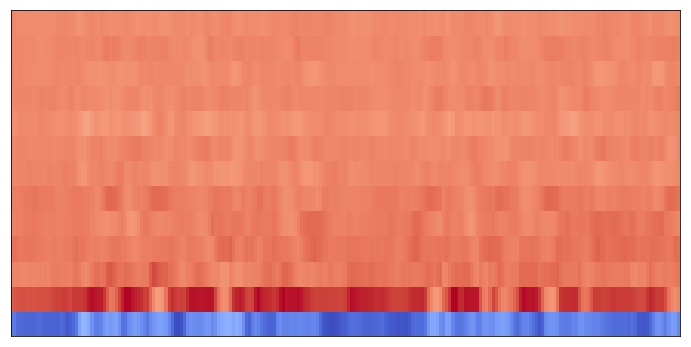

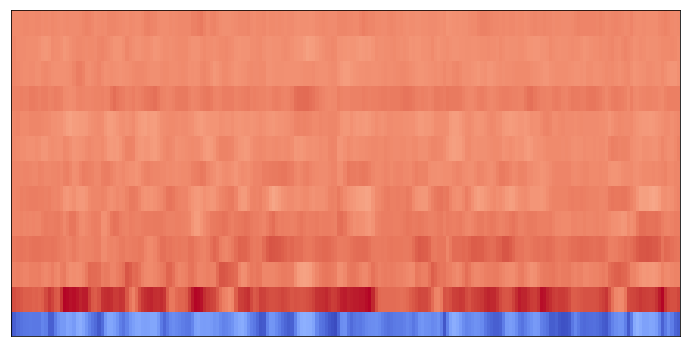

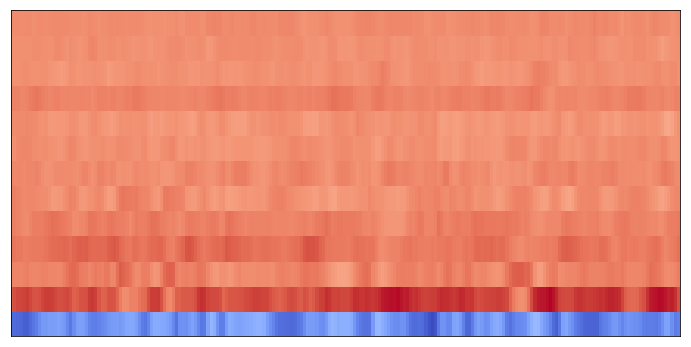

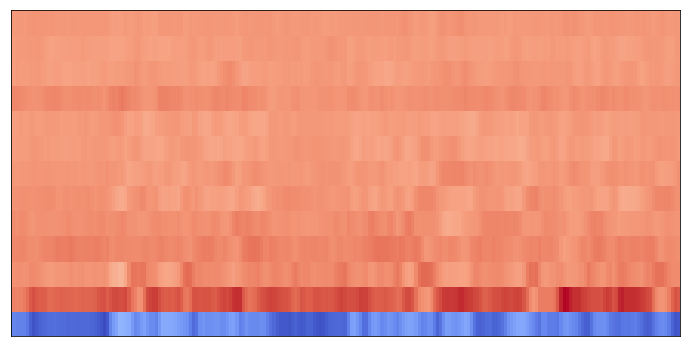

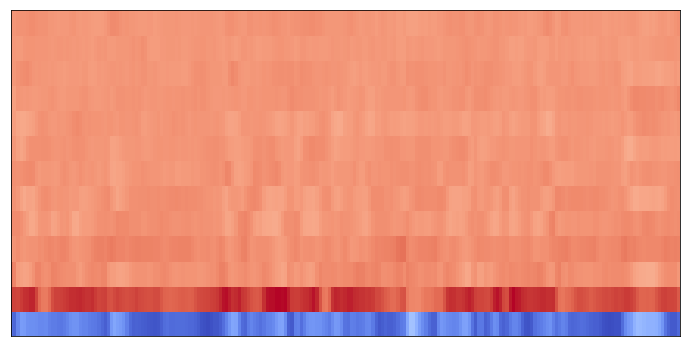

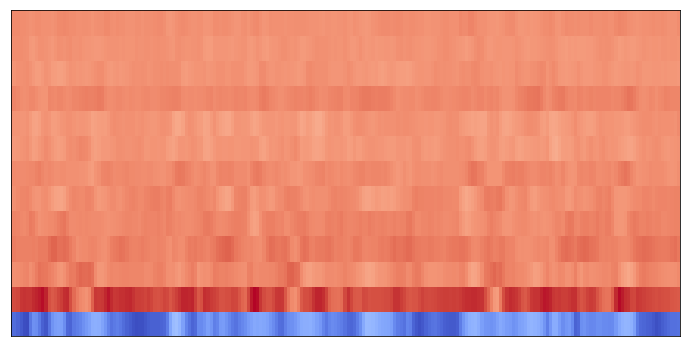

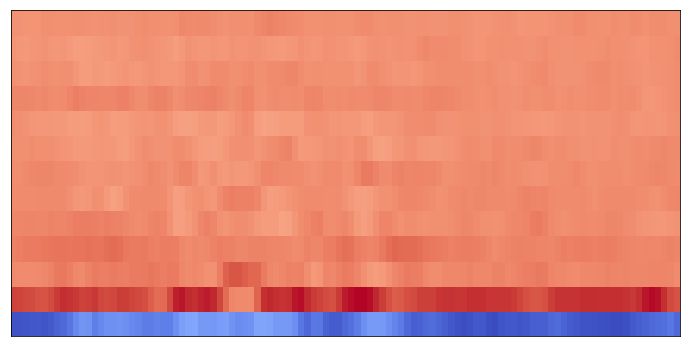

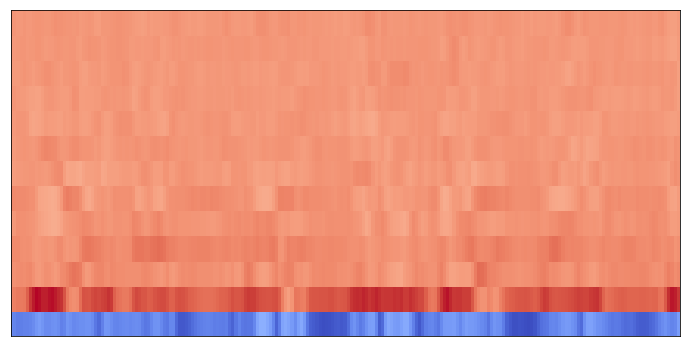

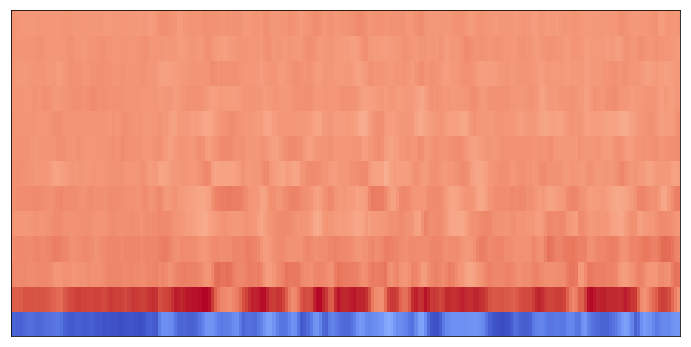

In [17]:
#Spectrogram of 5 sec wav files
import subprocess
import subprocess
import os
from pydub import AudioSegment
import os
from os import listdir
from os.path import isfile, join
import librosa
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
#import sox
# 513 800 3
#change the range(10)
for i in range(5):
    files = os.listdir(r'''/home/fractaluser/Desktop/SpeakAI/data123/train/wavs{}'''.format(i))
    
    if not os.path.exists(r'''/home/fractaluser/Desktop/SpeakAI/data123/train/speaker{}'''.format(i)):
        os.makedirs(r'''/home/fractaluser/Desktop/SpeakAI/data123/train/speaker{}'''.format(i))
    
    count = 1
    for f in files:
        path= '/home/fractaluser/Desktop/SpeakAI/data123/train/wavs{}/'.format(i)+f
        y,sr=librosa.load(path)
        S = librosa.feature.melspectrogram(y,sr=sr,n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)
        mfcc= librosa.feature.mfcc(S=log_S, n_mfcc=13)
        plt.figure(figsize=(12, 6))
        librosa.display.specshow(mfcc)
        newm = '.wav{}'.format(f)
        plt.savefig('/home/fractaluser/Desktop/SpeakAI/data123/train/speaker{}/{}'.format(i,f.strip('.wav'))+'.png')
#         cmdstring = 'sox "{}" -n spectrogram -r -o "{}"'.format(r'''/home/fractaluser/Desktop/SpeakAI/data1/train/wavs{}/{}'''.format(i, f), r'''/home/fractaluser/Desktop/SpeakAI/data1/train/speaker{}/{}.png'''.format(i, count))
#         subprocess.call(cmdstring, shell=True)
       
        count = count + 1